In [236]:
import numpy as np 
import matplotlib.pyplot as plt

from funicular import *

# Find Form using Member Geometry as a Constraint

In this notebook, a funicular form is desired where a specific member's slope is specified and there is a maximum force requirement. 

In [237]:
def get_intersect(m0, x0, y0, d, xi, yi):
    b = m0*x0 - y0 + yi
    
    A = (1+m0**2)
    B = (-2*xi-2*m0*b)
    C = (xi**2 + b**2 -d**2)
    
    if B**2 - 4*A*C < 0:
        return (np.nan, np.nan) ,(np.nan, np.nan)
    
    x1 = (-B + (B**2 - 4*A*C)**0.5 )/(2*A)
    y1 = m0*(x1-x0) + y0
    
    x2 = (-B - (B**2 - 4*A*C)**0.5 )/(2*A)
    y2 = m0*(x2-x0) + y0
    
    return (x1, y1), (x2, y2)

In [244]:
# Symmetric load case
loads_L = [-1375, -1270, -1225, -1160]
loads_R = loads_L.copy()
loads_R.reverse()

loads = loads_L + loads_R

# Set a slope for a member (len(loads) + 1 members)
m_ind = int(len(loads)/2)
m_slope = 3/100

# Material constraint
Fmax = (3*12*24*12)*800/1000

# X coordinates of forces
span = 324
X_loc = (np.cumsum(np.ones((1, len(loads)+2)))-1) *span/(len(loads)+1)

In [245]:
poly = funicular_polygon()
poly.set_loads(loads)

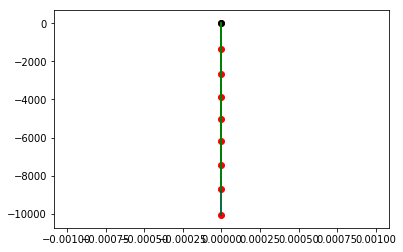

In [246]:
poly.plot_force()

In [247]:
origins = []
points = []

for p in poly.load_line:
    intersects = get_intersect(m_slope, poly.load_line[m_ind, 0], poly.load_line[m_ind, 1], Fmax, p[0], p[1])
    
    for o in intersects:
        points.append(o)
        poly.origin = o
        if np.nan not in o:
            if len(np.where(poly.forces()-Fmax>1**-4)[0]) == 0 and o not in origins:
                origins.append(o)

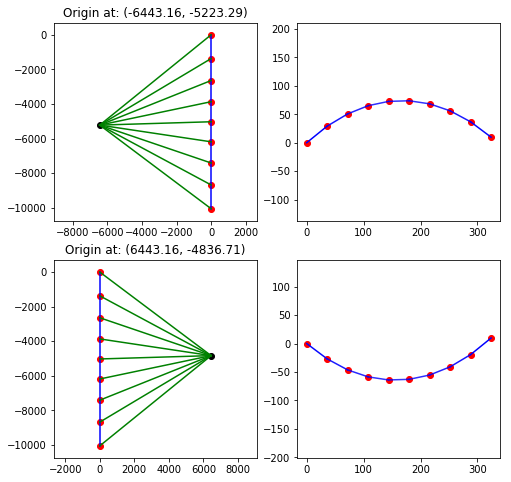

In [248]:
fig, ax = plt.subplots(len(origins), 2, figsize=(8, len(origins)*4))

for i, o in enumerate(origins):
    poly.origin = o
    poly.get_geometry(X_loc)
    poly.plot_force(ax=ax[i, 0])
    poly.plot_form(ax=ax[i, 1])
    
    ax[i, 0].set_title('Origin at: ('+str(round(o[0], 2))+', '+str(round(o[1], 2))+')')
    
    ax[i, 0].axis('equal')
    ax[i, 1].axis('equal')